## Introduction ot Regression with Neural Networks in TensorFlow

There are many defination for a regression problme but in ur case,

**we're going to simplify it:**

  predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

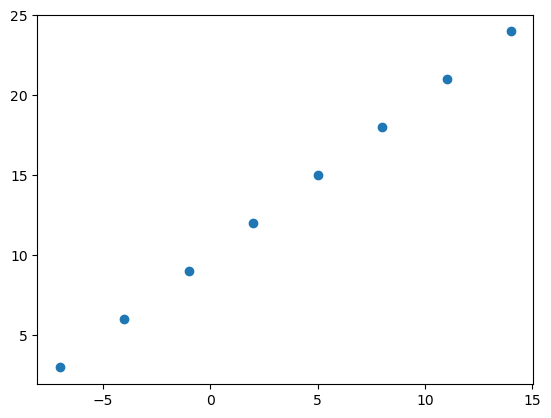

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# create feature

X=np.array([-7,-4,-1,2,5,8,11,14])

# create label
y=np.array([3,6,9,12,15,18,21,24])

# visualize it
plt.scatter(X,y)


# Input and Output

In [2]:

housing_info=tf.constant(["breedroom","bathroom","garage"])

housing_price=tf.constant([93400])



In [3]:
# Turn x and y to Tensor

X=tf.constant(X,dtype=tf.float32)
y=tf.constant(y,dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# steps in Modelling with Tenserflow 🏛️

1. createa a model - define the input and output layers, as well as the hidden layers of a deep learning model.

2. compile a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. fitting a model - letting the model try to find patterns between X & y (features and labels).

4. evaluate a model - how well the model is doing.

In [4]:
# set random seed

tf.random.set_seed(42)

# 1. create a model using sequential API

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1) # one hidden Layer
])

# 2. compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.SGD(),
              loss=tf.keras.losses.mae, # mean absolute error,
              metrics=["mae"]
              )

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated to expand dims

Epoch 1/5


2023-07-18 12:26:10.406884: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 296ms/step - loss: 12.0522 - mae: 12.0522
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.9197 - mae: 11.9197
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.7872 - mae: 11.7872
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.6547 - mae: 11.6547
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 11.5222 - mae: 11.5222


In [5]:
# check out X and y

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
# Try to make prediction

model.predict([20])


1/1 [==============================] - 0s 51ms/step


array([[11.823243]], dtype=float32)

## Improving the Model

we can improve  our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [7]:
# lets rebuild the model

# 1. create the model

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=["mae"]
)

# 3. Fit the model (longer Time)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated to expand dims


Epoch 1/100
1/1 [==============================] - 0s 130ms/step - loss: 9.3374 - mae: 9.3374
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 9.2049 - mae: 9.2049
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0724 - mae: 9.0724
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9399 - mae: 8.9399
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 8.8074 - mae: 8.8074
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.6749 - mae: 8.6749
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 8.5424 - mae: 8.5424
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.4099 - mae: 8.4099
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2774 - mae: 8.2774
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 8.1449 - mae: 8.1449
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 8.01

In [8]:
model.predict([17])

1/1 [==============================] - 0s 34ms/step


array([[29.930763]], dtype=float32)

In [9]:
# Recreate model 2 with extra 100 layers

model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
    metrics=["mae"]

)

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)



Epoch 1/100


/Users/magesh/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 251ms/step - loss: 13.0799 - mae: 13.0799
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.3244 - mae: 12.3244
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.5647 - mae: 11.5647
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7971 - mae: 10.7971
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0200 - mae: 10.0200
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 9.2313 - mae: 9.2313
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 8.4279 - mae: 8.4279
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.6065 - mae: 7.6065
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 6.7643 - mae: 6.7643
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.7761 - mae: 6.7761
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 7.1271 

In [10]:
model.predict([17])

1/1 [==============================] - 0s 45ms/step


array([[27.247744]], dtype=float32)

# Evalting a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

when it comes to evaluation there are 3 words you should memorize:

>  "Visualize, visualize, visualize"

it's a good idea to visualize:

* The data - what data are we working with? what does it look like?


* The model itself - what does our model look like?


* The training of a model - how does a model perform while it learns?

* The Predictions of the model- how do the predictions of a model line up against the ground truth (the original labels)?

Let's see some examples.

In [11]:
# make a bigger dataset
X=tf.range(-100,100,4)
# Make labels for the dataset
y=X+10 # this the formulat that our model should learnl



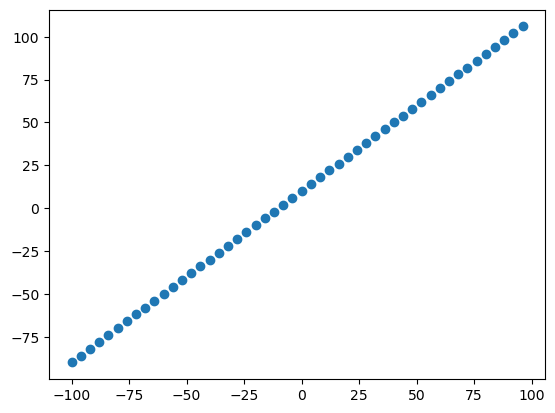

In [12]:
# visualize
import matplotlib.pyplot as plt

plt.scatter(X,y)

the 3 sets are:

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.

* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.

* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available and is only used once a model is completely trained (the model has never "seen" the data in the test set).


In [13]:
# split the dataset
# 80% training and 20% for testing

train=int(len(X) *0.75) # 75%
valid=train+int(len(X)*0.15) # 15 %

print(train,valid, )
x_train,y_train=X[0:train],y[:train]
# x_valid,y_valid=X[train:valid],y[train:valid]
x_test,y_test=X[train:],y[train:]

# len(x_train),len(x_test)
train

37 44


37

### Visualzing the data

Now we've got our data in training and test sets...let's visualize it again


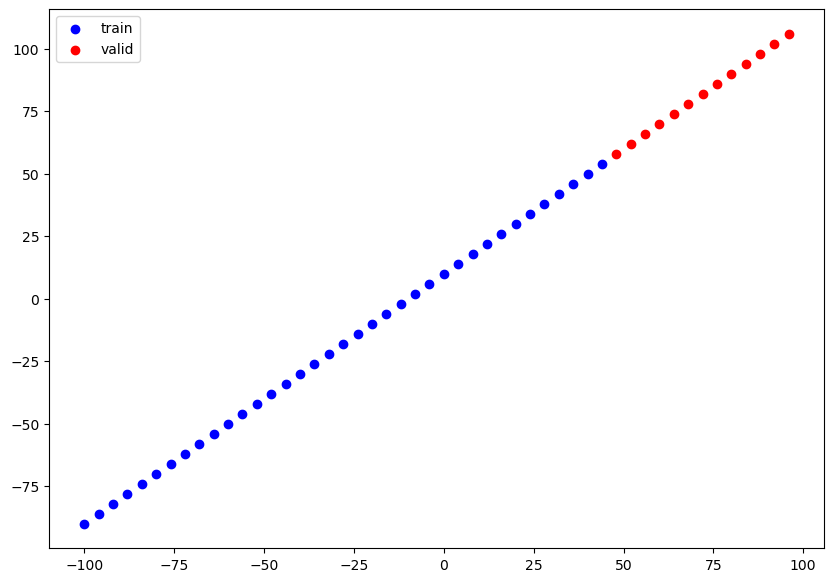

In [14]:
plt.figure(figsize=(10,7))

# plot train
plt.scatter(x_train,y_train,c="b",label="Traning data")

# plt.scatter(x_valid,y_valid,c="y",label="valid data")

plt.scatter(x_test,y_test,c="r",label="valid data")

plt.legend(["train","valid","test"])

In [15]:
# let build


# 1. create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile

model.compile(
    optimizer=tf.keras.optimizers.legacy.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

# 3. Fit the model
# model.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

In [16]:
# lets create the model which build automatically  by defining the input_shape

# 1. creat a model

model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
    metrics=["mae"]

)




In [17]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

* Total params - total number of parameters in the model.

* Trainable parameters - these are the parameters (patterns) the model can update as it trains.

* Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [ ]:
tf.expand_dims(x_train,axis=-1),y_train

(<tf.Tensor: shape=(37, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44]], dtype=int32)>,
 <tf.Tensor: shape=(37,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54], dtype=int32)>)

In [ ]:
model.fit( tf.expand_dims(x_train,axis=-1),y_train,epochs=100,verbose=2)

Epoch 1/100


2/2 - 0s - loss: 21.8797 - mae: 21.8797 - 258ms/epoch - 129ms/step
Epoch 2/100
2/2 - 0s - loss: 10.0727 - mae: 10.0727 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 10.8948 - mae: 10.8948 - 13ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 13.8880 - mae: 13.8880 - 13ms/epoch - 6ms/step
Epoch 5/100
2/2 - 0s - loss: 13.1533 - mae: 13.1533 - 14ms/epoch - 7ms/step
Epoch 6/100
2/2 - 0s - loss: 9.7978 - mae: 9.7978 - 14ms/epoch - 7ms/step
Epoch 7/100
2/2 - 0s - loss: 6.8457 - mae: 6.8457 - 17ms/epoch - 9ms/step
Epoch 8/100
2/2 - 0s - loss: 9.0756 - mae: 9.0756 - 16ms/epoch - 8ms/step
Epoch 9/100
2/2 - 0s - loss: 8.8754 - mae: 8.8754 - 9ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 6.8283 - mae: 6.8283 - 10ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 7.4326 - mae: 7.4326 - 10ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 8.1680 - mae: 8.1680 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 7.0072 - mae: 7.0072 - 10ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 6.23

In [ ]:
model.predict(x_test)

1/1 [==============================] - 0s 36ms/step


array([[ 59.451557],
       [ 63.58521 ],
       [ 67.718864],
       [ 71.852516],
       [ 75.98617 ],
       [ 80.11983 ],
       [ 84.25347 ],
       [ 88.38714 ],
       [ 92.52078 ],
       [ 96.654434],
       [100.788086],
       [104.92174 ],
       [109.0554  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(13,), dtype=int32, numpy=
array([ 58,  62,  66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106],
      dtype=int32)>

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Visualizing our model's predictions

To visualize predictions,its  a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).


In [ ]:
# make some predictions

y_preds=model.predict(x_test)
y_preds

1/1 [==============================] - 0s 21ms/step


array([[ 59.451557],
       [ 63.58521 ],
       [ 67.718864],
       [ 71.852516],
       [ 75.98617 ],
       [ 80.11983 ],
       [ 84.25347 ],
       [ 88.38714 ],
       [ 92.52078 ],
       [ 96.654434],
       [100.788086],
       [104.92174 ],
       [109.0554  ]], dtype=float32)

In [ ]:
# Create a plot function to visualize y_preds and y_train

def plot_prediction(y_preds,train_data=x_train,train_label=y_train,test_data=x_test,test_label=y_test):
    plt.figure(figsize=(10,7))
    # plot train data
    plt.scatter(train_data,train_label,c="b",label="train data")
    # plot test data
    plt.scatter(test_data,test_label,c="g",label="train data")
    # plot model prediction vs actual
    plt.scatter(test_data,y_preds,c="r",label="predict data")

    plt.legend()

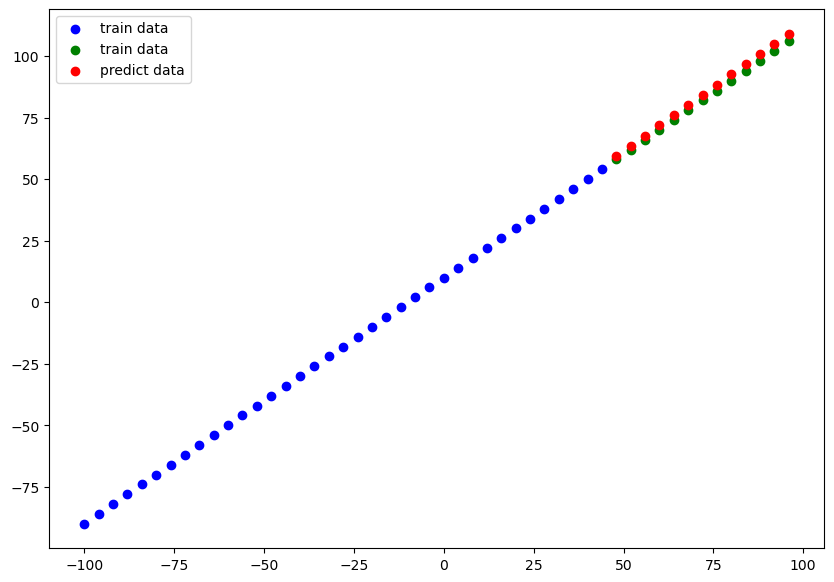

In [ ]:
plot_prediction(y_preds=y_preds)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* **MAE** - mean absolute error, "on average, how wrong is each of my model's predictions"

* **MSE** - mean square error, "square the average errors"



In [ ]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 110ms/step - loss: 2.2535 - mae: 2.2535


[2.253476142883301, 2.253476142883301]

In [ ]:
# want to squeez the y_pres so that our test and y_prdes are in same shape
tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=2.2534761>

In [ ]:
# Mean square erroe

tf.metrics.MSE(y_test,tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=5.328239>

In [ ]:
def evaluate_model(y_true,y_preds):
    score={}
    score["MSE"]=tf.metrics.MSE(y_test,tf.squeeze(y_preds))
    score["MAE"]=tf.metrics.MAE(y_test,tf.squeeze(y_preds))

    return score


In [ ]:
evaluate_model(y_train,y_preds)

{'MSE': <tf.Tensor: shape=(), dtype=float32, numpy=5.328239>,
 'MAE': <tf.Tensor: shape=(), dtype=float32, numpy=2.2534761>}

## Running   experiments to imporove the model

The main ways to imporove a deep model:

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as original model, 1 layer, trained for 100 epochs.

2. `model_2` - 2 layers, trained for 100 epochs.

3. `model_3` - 2 layers, trained for 500 epochs.


In [ ]:
# model 1

tf.random.set_seed(42)

# 1. create the model

model_1=tf.keras.Sequential(
    [
    tf.keras.layers.Dense(1)
    ]
)

# 2. complie

model_1.compile(
    optimizer=tf.keras.optimizers.legacy.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

# 3. fit the model

model_1.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 59ms/step - loss: 90.5059 - mae: 90.5059
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 49.1354 - mae: 49.1354
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 19.4171 - mae: 19.4171
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 10.4614 - mae: 10.4614
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9002 - mae: 14.9002
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 11.4018 - mae: 11.4018
Epoch 7/100
2/2 [==============================] - 0s 24ms/step - loss: 9.1994 - mae: 9.1994
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 11.6434 - mae: 11.6434
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 12.8297 - mae: 12.8297
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 7.5306 - mae: 7.5306
Epoch 11/100
2/2 [==============================] - 0s 

In [ ]:
# visualize
y_preds=model_1.predict(x_test)


1/1 [==============================] - 0s 32ms/step


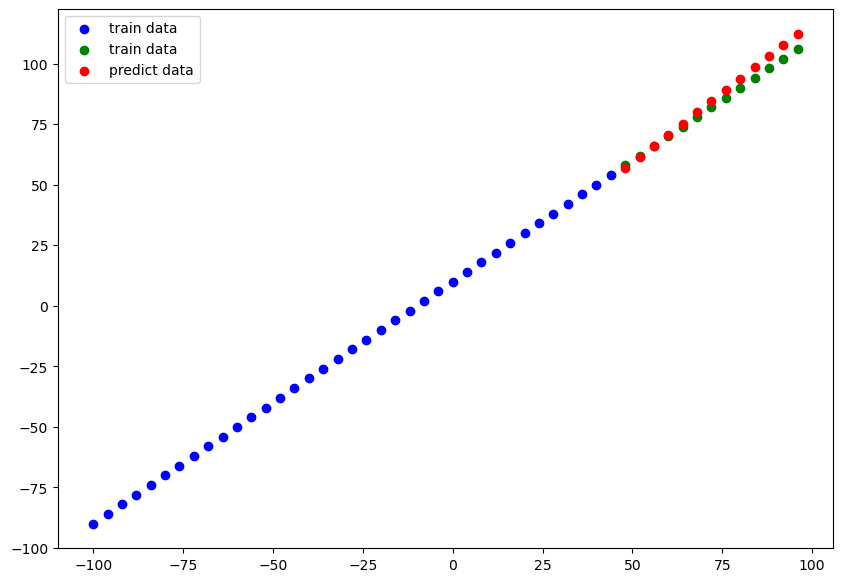

In [ ]:
plot_prediction(y_preds=y_preds)

In [ ]:
# Evaluate

result1=evaluate_model(y_test,y_preds)

**Build `Model 2`**

* 2 dense layers, trained for 100 epochs.

* `model_2` will be the same as `model_1` except it will have an extra layer with 10 hidden units.


In [ ]:
# set random set
tf.random.set_seed(42)
# 1. building the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model

model_2.compile(
    optimizer=tf.keras.optimizers.legacy.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mse"]
)

# 3. Fit the mode

model_2.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 37ms/step - loss: 30.0137 - mse: 2067.2495
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 65.9885 - mse: 6767.5327
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 14.0388 - mse: 231.8723
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 21.0795 - mse: 581.9918
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 32.4672 - mse: 1572.7646
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 13.9946 - mse: 238.7555
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 13.7033 - mse: 225.6451
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 16.3867 - mse: 380.1796
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 12.9942 - mse: 192.7862
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 7.9508 - mse: 96.9124
Epoch 11/100
2/2 [=============================

In [ ]:

# visualize
y_preds2=model_2.predict(x_test)
y_preds2

1/1 [==============================] - 0s 32ms/step


array([[42.896156],
       [46.348366],
       [49.80057 ],
       [53.25278 ],
       [56.70499 ],
       [60.157196],
       [63.609406],
       [67.061615],
       [70.513824],
       [73.96603 ],
       [77.418236],
       [80.870445],
       [84.322655]], dtype=float32)

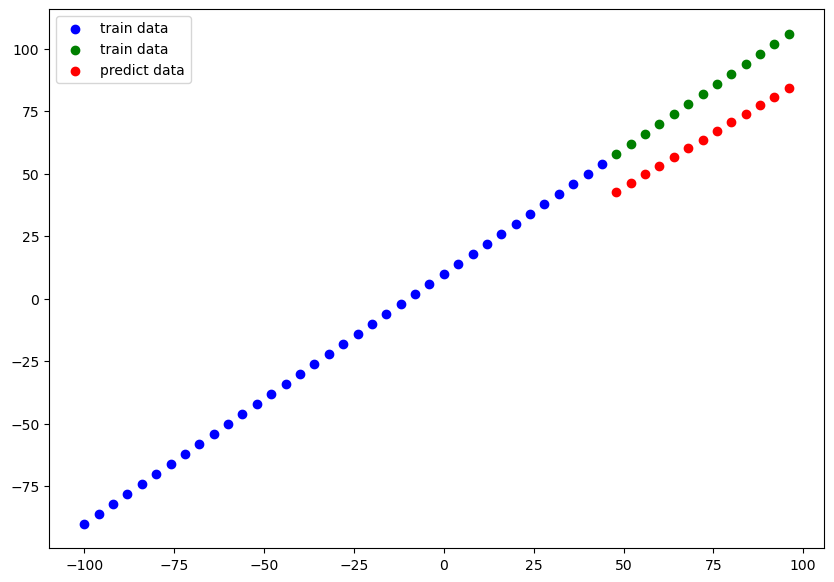

In [ ]:
plot_prediction(y_preds=y_preds2)

In [ ]:
result2=evaluate_model(y_test,y_preds2)

**Build `Model 3`**

* 2 dense layers, trained for 500 epochs.

In [ ]:
# set random set
tf.random.set_seed(42)
# 1. building the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model

model_3.compile(
    optimizer=tf.keras.optimizers.legacy.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

# 3. Fit the mode

model_3.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=500,verbose=1)

Epoch 1/500
2/2 [==============================] - 0s 28ms/step - loss: 19.9112 - mae: 19.9112
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 47.0180 - mae: 47.0180
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 7.5110 - mae: 7.5110
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 14.5632 - mae: 14.5632
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 20.8729 - mae: 20.8729
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 8.4160 - mae: 8.4160
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 13.6495 - mae: 13.6495
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 18.8225 - mae: 18.8225
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 23.1491 - mae: 23.1491
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 14.2261 - mae: 14.2261
Epoch 11/500
2/2 [==============================] - 0s 5ms/ste

In [ ]:
y_preds3=model_3.predict(x_test)
y_preds3

1/1 [==============================] - 0s 29ms/step


array([[36.198395],
       [38.761288],
       [41.324173],
       [43.88706 ],
       [46.449947],
       [49.012833],
       [51.575726],
       [54.13861 ],
       [56.701496],
       [59.26438 ],
       [61.82727 ],
       [64.39015 ],
       [66.95305 ]], dtype=float32)

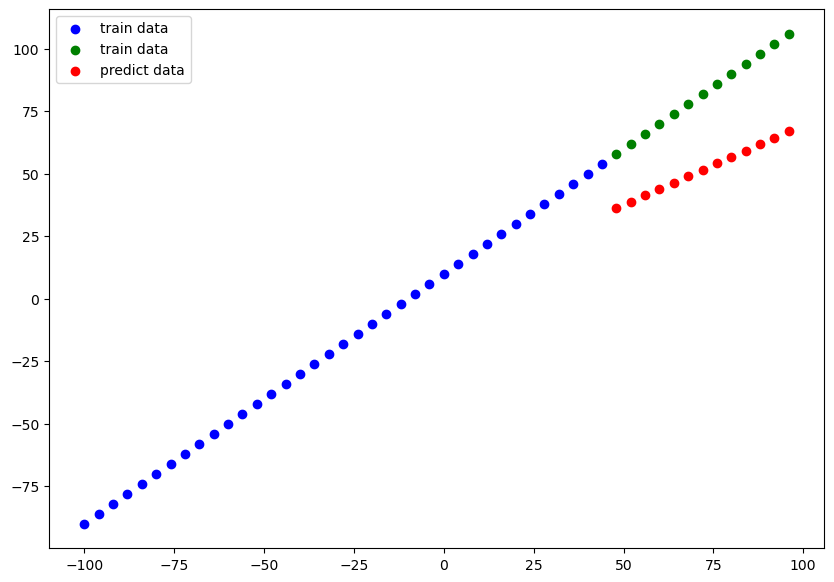

In [ ]:
plot_prediction(y_preds3)

In [ ]:
# Evaluation

result3=evaluate_model(y_test,y_preds)

# let compare the results of Three model

In [ ]:
# plot everything

import seaborn as sn
import pandas as pd


df=pd.DataFrame(data=[result1,result2,result3])


In [ ]:
# lets conver the df
df
df["MAE"]=[d.numpy() for d in df['MAE']]
df["MSE"]=[d.numpy() for d in df['MSE']]

<Axes: xlabel='models', ylabel='Scores'>

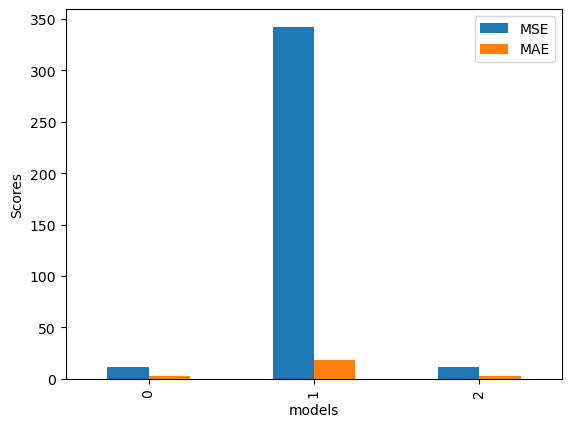

In [ ]:
df.plot(kind="bar",xlabel="models",ylabel="Scores")

>🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments
* One really good habit in machine learning modelling is to track the results of your experiments.

* And when doing so, it can be tedious if you're running lots of experiments.

* Luckily, there are tools to help us!

**📖 Resource: As you build more models, you'll want to look into using:**

1. TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).

2. Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

### Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_1.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


### Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_preds = model_1.predict(x_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(x_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 14ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Large Scale Model 🏛️



In [18]:

# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [19]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [21]:
# Data Splitting
x=insurance_one_hot.drop("charges",axis=1) # Features
y=insurance_one_hot["charges"]

In [22]:
# split train and test set
# 20% -> test & 80% -> train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
# create a model
import tensorflow as tf

# set random seed
tf.random.set_seed(42)
# 1. Create a model
model=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(20),
        tf.keras.layers.Dense(10)
    ]
)

# 2. Compile the model

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=["mae"]
)

# 3. fit the mode

model.fit(x_train,y_train,epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 5ms/step - loss: 10552.5449 - mae: 10552.5449
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7372.3081 - mae: 7372.3081
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7185.0117 - mae: 7185.0117
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7096.0034 - mae: 7096.0034
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 6974.2236 - mae: 6974.2236
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 6991.2817 - mae: 6991.2817
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7006.6743 - mae: 7006.6743
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 6994.8735 - mae: 6994.8735
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7002.1416 - mae: 7002.1416
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7006.6514 - mae: 7006.65

In [24]:
# evalute model

model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 6ms/step - loss: 5669.2041 - mae: 5669.2041


[5669.2041015625, 5669.2041015625]

In [25]:
y_preds=model.predict(x_test)
y_preds

9/9 [==============================] - 0s 2ms/step


array([[12503.806 , 12531.944 , 12556.599 , ..., 12555.478 , 12536.981 ,
        12549.9795],
       [10966.053 , 10990.468 , 11010.661 , ..., 11008.905 , 10992.881 ,
        11005.05  ],
       [ 1444.2471,  1445.3215,  1433.6321, ...,  1436.0316,  1437.4032,
         1438.9681],
       ...,
       [ 5884.8125,  5897.4673,  5904.3584, ...,  5903.892 ,  5896.643 ,
         5903.0146],
       [ 5151.175 ,  5161.71  ,  5168.781 , ...,  5169.5645,  5162.1763,
         5167.5107],
       [ 1714.2164,  1716.6366,  1705.2042, ...,  1705.1633,  1707.6865,
         1709.8071]], dtype=float32)

Right now it look like our model isn't performing too well...

let's improve it

1. Add an extra layer with more hidden units and use the Adam optimizer and train for longer.
2. Same as above but train for longer (200 epochs).

In [26]:
# set Rondom seed
tf.random.set_seed(42)

# 1.create modekl

insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1,activation=None)
])

# 2.compile the model

insurance_model_2.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.legacy.Adam(0.01),
    metrics=["mae"]
)

# 3. fit the model

history=insurance_model_2.fit(x_train,y_train,epochs=100 )

Epoch 1/100
34/34 [==============================] - 0s 6ms/step - loss: 11611.2539 - mae: 11611.2539
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 7716.9609 - mae: 7716.9609
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7418.5171 - mae: 7418.5171
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7216.3433 - mae: 7216.3433
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 6996.6084 - mae: 6996.6084
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 6686.2402 - mae: 6686.2402
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 6536.5933 - mae: 6536.5933
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 6413.6636 - mae: 6413.6636
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 6319.0508 - mae: 6319.0508
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 6086.4409 - mae: 6086.44

In [27]:
insurance_model_2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 2747.0872 - mae: 2747.0872


[2747.087158203125, 2747.087158203125]

Text(0, 0.5, 'loss')

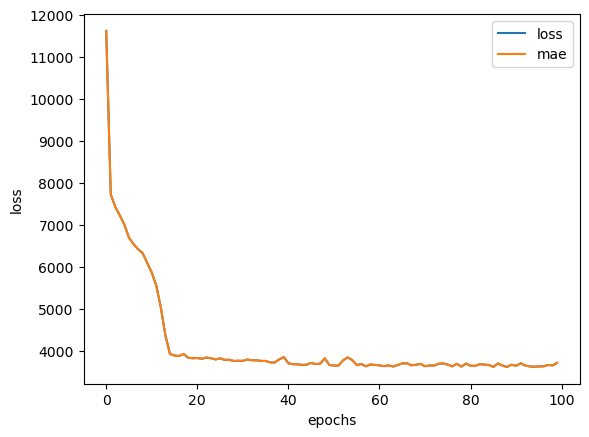

In [28]:
#Plot history (also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

> Question : How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before. And luckily, there are many answers.
                                                      

# Preprocessing the Data(Normalization & standardization)


In [52]:
# Read in the insurance dataset
insurance2 = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [49]:
insurance2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [54]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

# create a column transfomer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),[ "smoker","region"])

)

# create x and y

X=insurance2.drop("charges",axis=1)
y=insurance2["charges"]

# split train and test set
# 20% -> test & 80% -> train
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# fit the column transformer to our traning data
# ct.fit(x_train)

ct.fit(x_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['smoker', 'region'])])

In [58]:
# tranfrom traning and test data with normalize value

x_train_normal=ct.transform(x_train)
x_test_normal=ct.transform(x_test)

In [59]:
x_train_normal

array([[0.02173913, 0.50686037, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.38848534, 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.06521739, 0.44982513, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.52173913, 0.68240517, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.89130435, 0.31638418, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.59806295, 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Build Neural networks with it 

In [61]:
# set random seed

tf.random.set_seed(42)

# 1. create a model

insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1),
])

# compile the model

insurance_model_3.compile(
     loss="mae",
    optimizer=tf.keras.optimizers.legacy.Adam(0.01),
    metrics=["mae"]
)

insurance_model_3.fit(x_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 6ms/step - loss: 12925.8906 - mae: 12925.8906
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 9407.2617 - mae: 9407.2617
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7416.8003 - mae: 7416.8003
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 6374.9102 - mae: 6374.9102
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 4509.7305 - mae: 4509.7305
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 3679.9407 - mae: 3679.9407
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 3613.6216 - mae: 3613.6216
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 3606.2717 - mae: 3606.2717
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 3544.5549 - mae: 3544.5549
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 3531.4338 - mae: 3531.43

In [62]:
insurance_model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               1000      
                                                                 
 dense_16 (Dense)            (None, 50)                5050      
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 6,101
Trainable params: 6,101
Non-trainable params: 0
_________________________________________________________________
